**Importing all the required libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix

**Reading the dataset using pandas library**

In [2]:
dataset=pd.read_csv('Weather prediction dataset - Sheet1.csv')
dataset.head()

,Day,Month,Year,Humidity,Max Temperature,Min Temperature,Rainfall,Sea Level Pressure,Sunshine,Wind Speed,Cloud
0,1,1,1988,77,26.7,12.9,0,1016.9,8.4,0.0,0
1,2,1,1988,76,26.0,12.9,0,1016.4,8.4,0.0,0
2,3,1,1988,73,27.5,14.5,0,1014.8,7.8,2.0,1
3,4,1,1988,71,27.2,15.8,0,1015.9,6.4,5.0,1
4,5,1,1988,75,27.8,15.4,0,1016.1,8.0,3.5,1


**Declaring the target variable which is to be predicted and the remaining features from the dataset**

In [3]:
features = ['Day','Month','Year','Humidity','Max Temperature','Min Temperature',
            'Rainfall','Sea Level Pressure','Sunshine','Wind Speed']
target = 'Cloud'

**Splitting the dataset into train and test dataset in the ratio 80:20**

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset[features], dataset[target],
                                                   test_size=0.2, random_state=42)

**Since the data is in different units we standardise it using the StandardScaler library The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.**

In [5]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**We have used SupportVectorClassifier to classify the target variable ie cloudy , which would classify as cloudy-1 or not cloudy 0. We have used ther RBF kernal as it is the most common used kernel**

In [6]:
model = svm.SVC(kernel='rbf', random_state=42)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

**Printed the training accuracy and testing accuracy**

In [7]:
print("Showing Performance Metrics for Support Vector Machine\n")
print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))
print("\n")

Showing Performance Metrics for Support Vector Machine

Training Accuracy: 1.0
Testing Accuracy: 0.8




**Plotted the confusion matrix for it**

In [8]:
print("Confusion Matrix for Support Vector Machine\n")
cm = confusion_matrix(y_test, predicted)
print(cm)

print("\n")

Confusion Matrix for Support Vector Machine

[[4 0]
 [1 0]]




**Displayed the classification report with parameters like precision , recall , f1-score and accuracy of the model**

In [9]:
print('Precision, Recall and f-1 Scores for Support Vector Machine\n')
print(classification_report(y_test, predicted))

Precision, Recall and f-1 Scores for Support Vector Machine

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Plotted the graphical confusion martix**

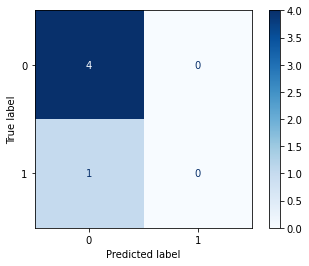

In [10]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)